## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [16]:
data = get_data(data_path='motorbike_ambulance_calls.csv')
print(data)

       index      date  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1    1/1/11  spring   0     1   0        0        6           0   
1          2    1/1/11  spring   0     1   1        0        6           0   
2          3    1/1/11  spring   0     1   2        0        6           0   
3          4    1/1/11  spring   0     1   3        0        6           0   
4          5    1/1/11  spring   0     1   4        0        6           0   
...      ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374  17375  12/31/12  spring   1    12  19        0        1           1   
17375  17376  12/31/12  spring   1    12  20        0        1           1   
17376  17377  12/31/12  spring   1    12  21        0        1           1   
17377  17378  12/31/12  spring   1    12  22        0        1           1   
17378  17379  12/31/12  spring   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  
0      

In [6]:
data.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [7]:
data.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

In [8]:
data.max()

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [9]:
print(data.shape)

(17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** перевірте всі змінні на наявність пропусків.

In [11]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**

1. Визначено розмірність датасету, що дозволило поглянути на його обсяг. Також проведено аналіз статистичних характеристик числових змінних і отримано уявлення про діапазон значень кожної змінної.
2. Проаналізовано типи даних та кількість записів для кожної змінної. Лише два атрибути мають тип "object", всі інші мають числовий вигляд.
3. Перевірено датасет на пропущені значення. Пропуски відсутні, отже використовуються всі атрибути без видалення з датасету.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [102]:
def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    print(df[date_col_name])
    return df

data = transform_date(data, 'date')
print(data['date'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]
0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]


In [103]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


4. Перетворено змінну date з типу даних "object" в "datetime". Також  преконалась що данні справді було зібрано за два роки, що не перешкоджає подальшій роботі.



#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [90]:
data_categorical = data[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']]
print(data_categorical)

       season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0         1.0   0     1   0        0        6           0           1
1         1.0   0     1   1        0        6           0           1
2         1.0   0     1   2        0        6           0           1
3         1.0   0     1   3        0        6           0           1
4         1.0   0     1   4        0        6           0           1
...       ...  ..   ...  ..      ...      ...         ...         ...
17374     1.0   1    12  19        0        1           1           2
17375     1.0   1    12  20        0        1           1           2
17376     1.0   1    12  21        0        1           1           1
17377     1.0   1    12  22        0        1           1           1
17378     1.0   1    12  23        0        1           1           1

[17379 rows x 8 columns]


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [91]:
def encode_season(df: pd.DataFrame, season_col_name: str) -> pd.DataFrame:
    season_map = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    df[season_col_name] = df[season_col_name].map(season_map).fillna(df[season_col_name]) 
    return df

data = encode_season(data.copy(), 'season')  
unique_seasons = data['season'].unique()
print(unique_seasons)


[1. 2. 3. 4.]


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

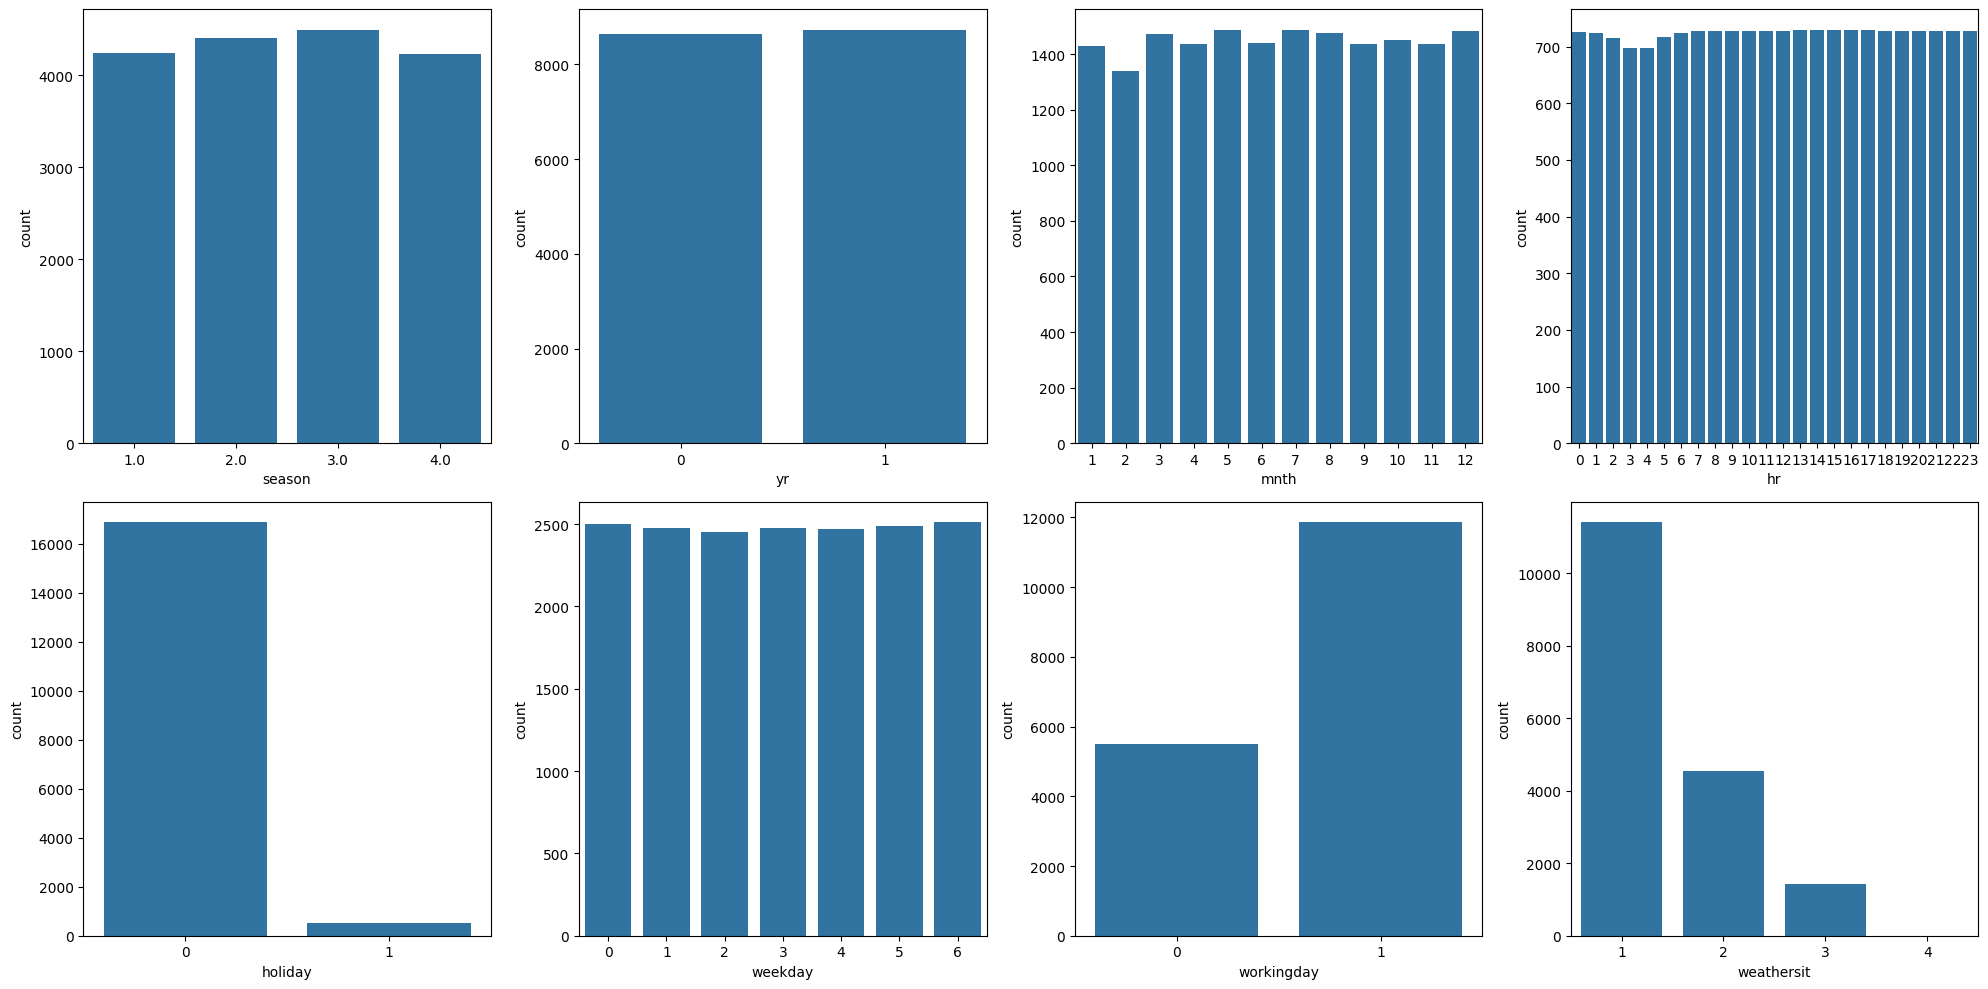

In [104]:
def plot_categorical_data(data, categorical_columns, rows=2, cols=4, figsize=(20, 10)):
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    for idx, variable in enumerate(categorical_columns):
        sns.countplot(x=variable, data=data, ax=ax[idx // cols, idx % cols])
    plt.tight_layout()
    plt.show()

plot_categorical_data(data, data_categorical)


**Висновки з 5-7 завдання (детальні)**

5. Категоріальні змінні виділено в окремий датасет для більшої доступності.  
6. Перетворено атрибут "season" в числову шкалу та категоріальну зміну, оскільки він має важливу роль в подальшому аналізі датасету.
7. Побудувано графіки аналізуючі котрі, я не можу сказати як далі буде виглядати аналіз датасету.

#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [108]:
data_numerical = data[['temp','hum','windspeed','atemp','cnt']]
data_numerical

,temp,hum,windspeed,atemp,cnt
0,0.24,0.81,0.0000,0.2879,16
1,0.22,0.80,0.0000,0.2727,40
2,0.22,0.80,0.0000,0.2727,32
3,0.24,0.75,0.0000,0.2879,13
4,0.24,0.75,0.0000,0.2879,1
...,...,...,...,...,...
17374,0.26,0.60,0.1642,0.2576,119
17375,0.26,0.60,0.1642,0.2576,89
17376,0.26,0.60,0.1642,0.2576,90
17377,0.26,0.56,0.1343,0.2727,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

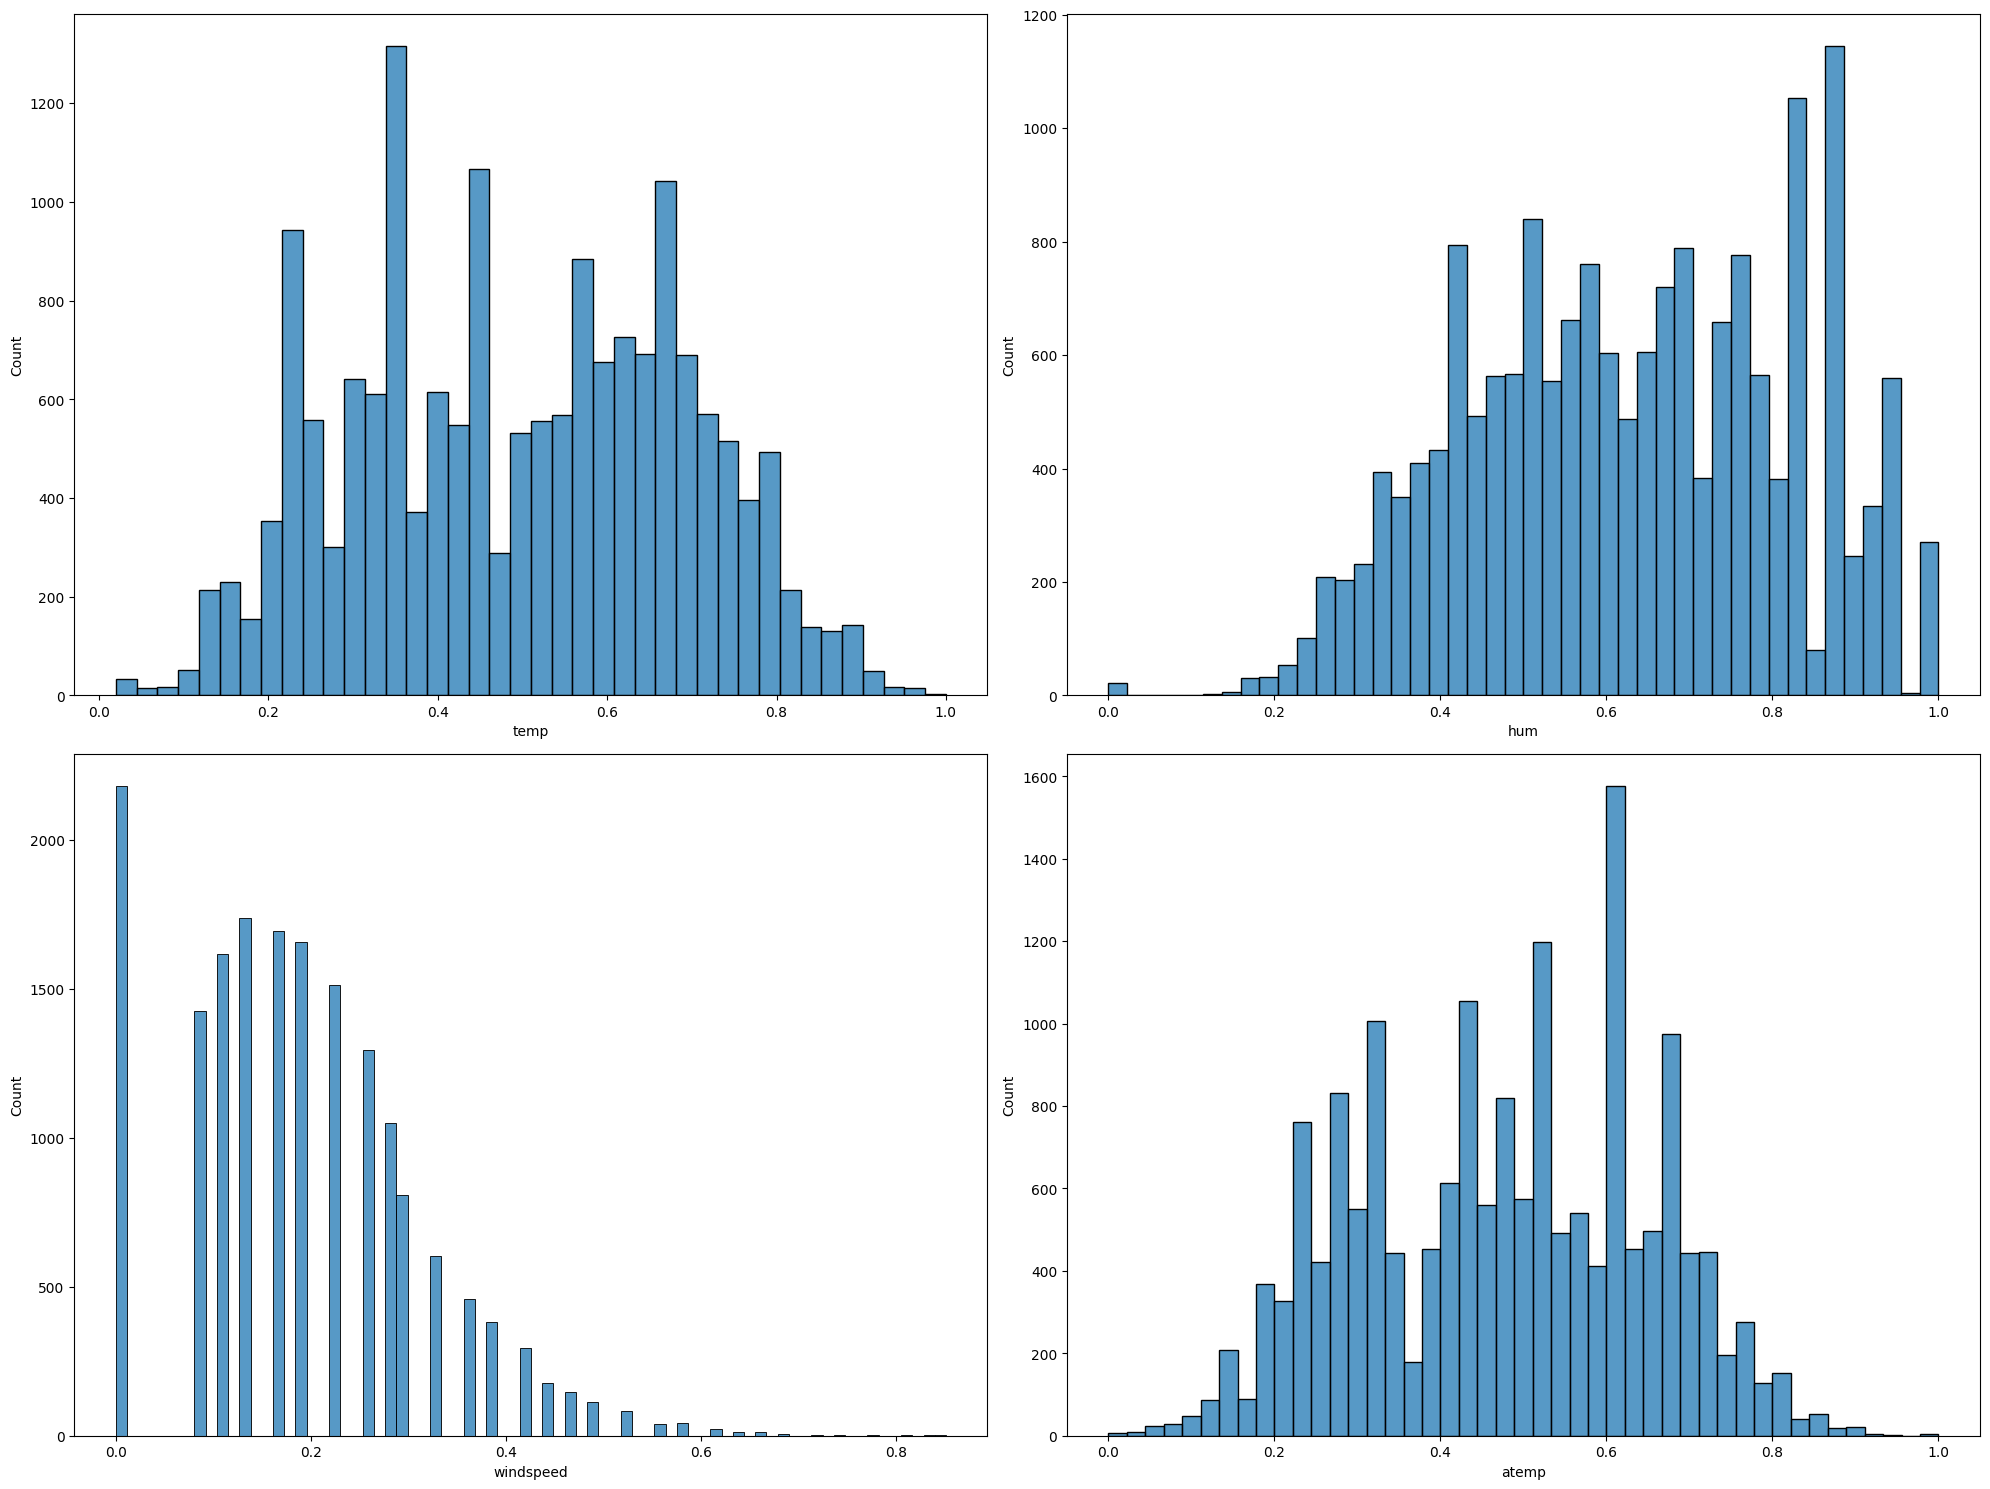

In [107]:
def plot_numerical_data(data, numerical_columns, rows=2, cols=2, figsize=(20, 15)):
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    for idx, variable in enumerate(numerical_columns):
        sns.histplot(x=variable, data=data, ax=ax[idx // cols, idx % cols])
    plt.tight_layout()
    plt.show()

data_numerical = ['temp', 'hum', 'windspeed', 'atemp']
plot_numerical_data(data, data_numerical)


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness: 1.2774116037490577


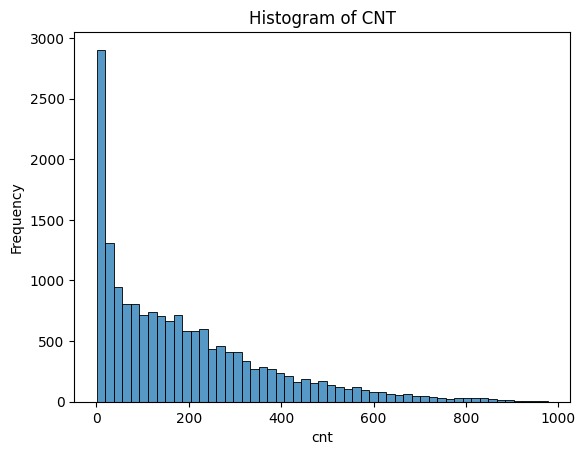

In [106]:
def plot_histogram_and_skewness(data, column_name):
    sns.histplot(data[column_name])
    coefficient_skew = data[column_name].skew()
    print("Skewness:", coefficient_skew)
    plt.title('Histogram of CNT')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram_and_skewness(data, 'cnt')


**Висновки з 8-10 завдання (детальні)**


8. Числові змінні виділено в окремий датасет для більшої зручності.  
9. Основуючись тим, що тут є біномінальні та експоненціальні росподіли це дає мені нову інформацію про данні датасету.
10. Коєфіцієнт дорівює 1.2774116037490577, що є більшим за 0, отже більша кількість даних знаходиться ліворуч від сер.значення і хвіст тягнеться праворуч. Припускаю, що ці можливі викиди даних вплинуть висновки в подальшому.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

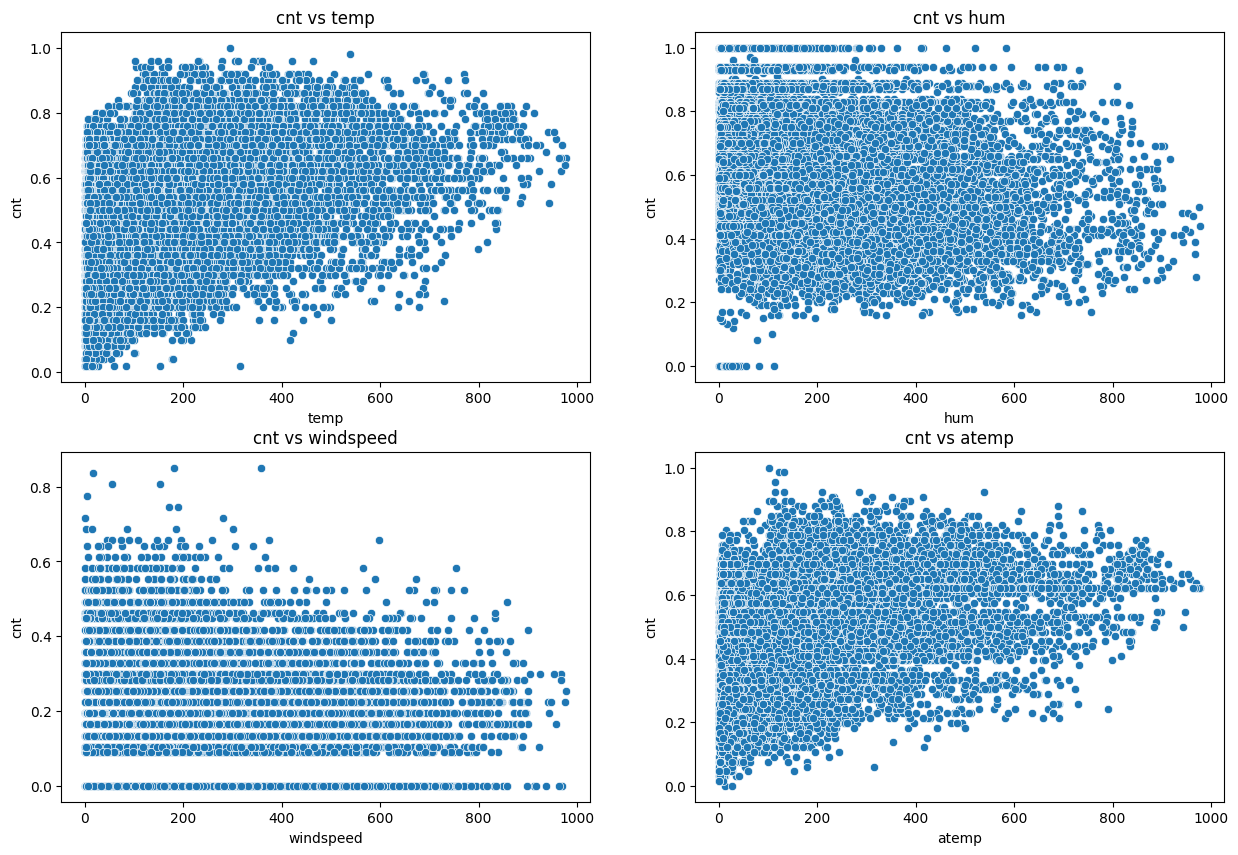

In [109]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(x='cnt' , y=var, data=data_numerical , ax= subplot)
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

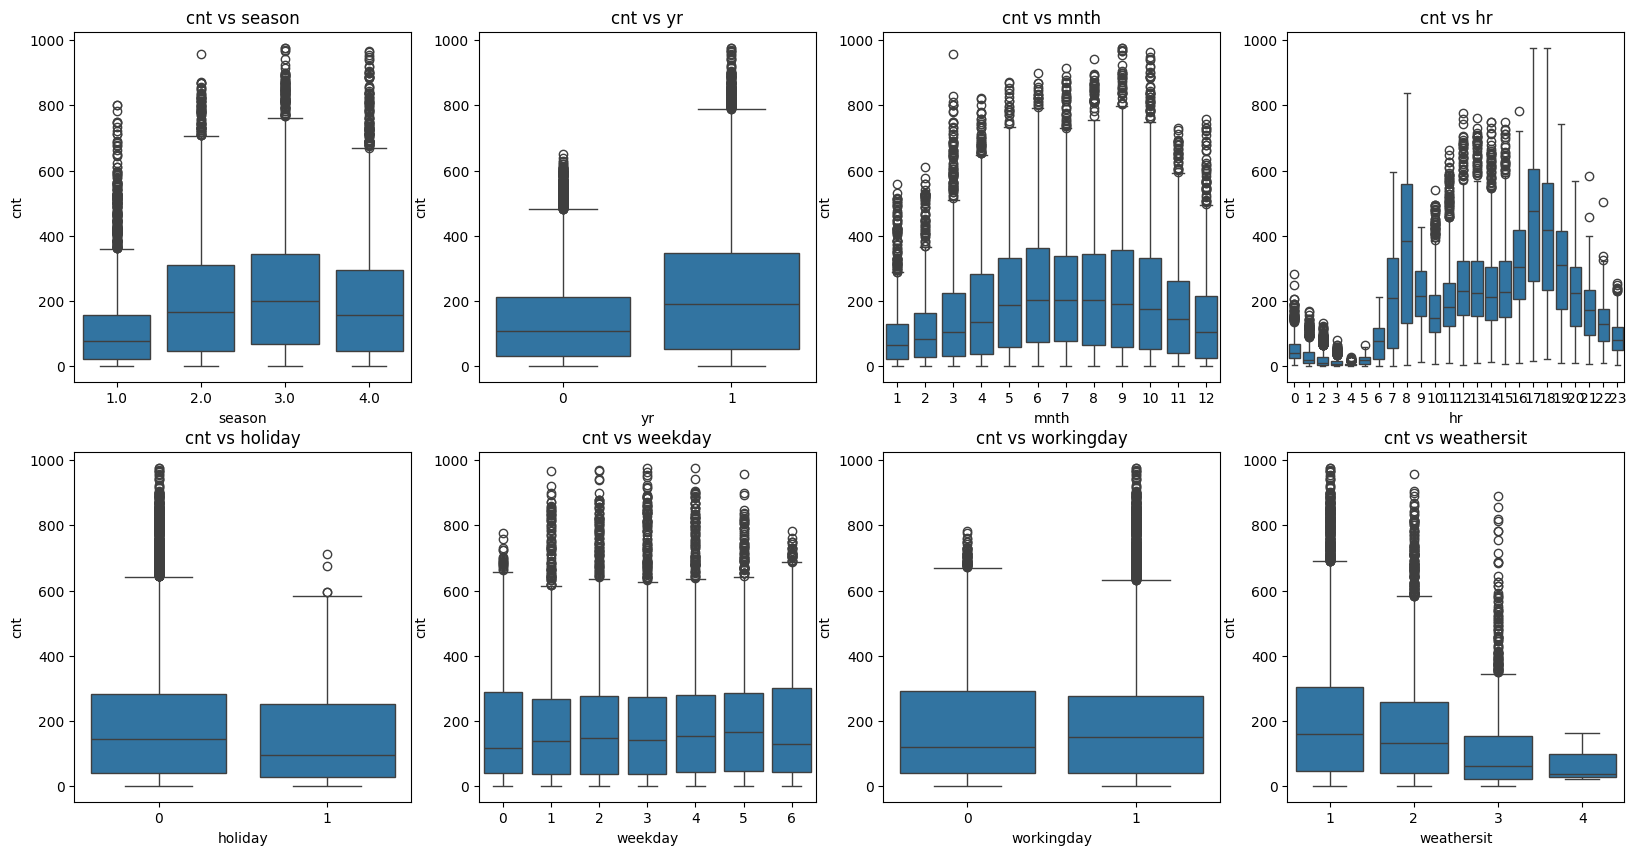

In [97]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=var , y= 'cnt', data=data , ax= subplot)
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.show()

**Висновки з 11-12 завдання (детальні)**


11. Після побудови графіка я бачу деяку залежність між змінними. Більша температура = більше викликів швидкої, при сильнішій швидкості вітру викликів швидкої було мінімально і навпаки.
12. З 0-5 години викливів практично немає, з 8 години кількість викликів збільшується, з 17-18 знову зрістає кількість викликів. Присутня залежність з людським темпом життя. Чим краща погода тим більше викликів. Кількість викликів швидкої є майже стабільною коен день.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

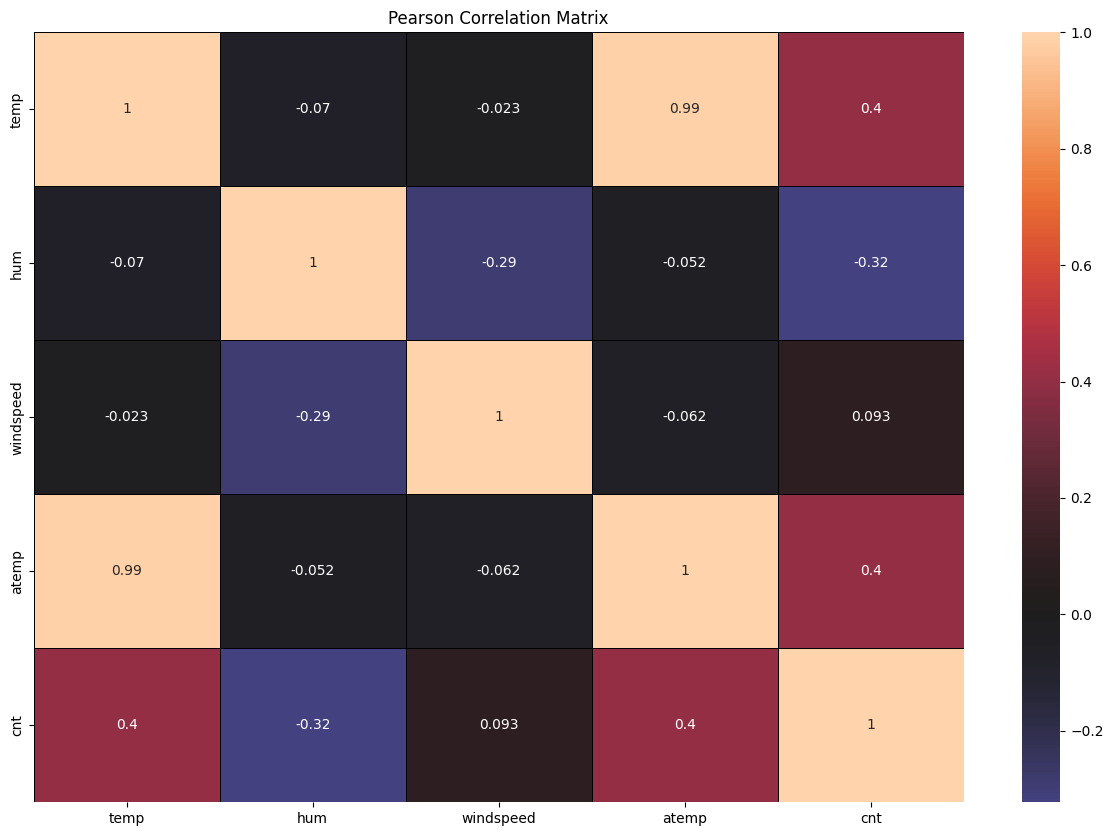

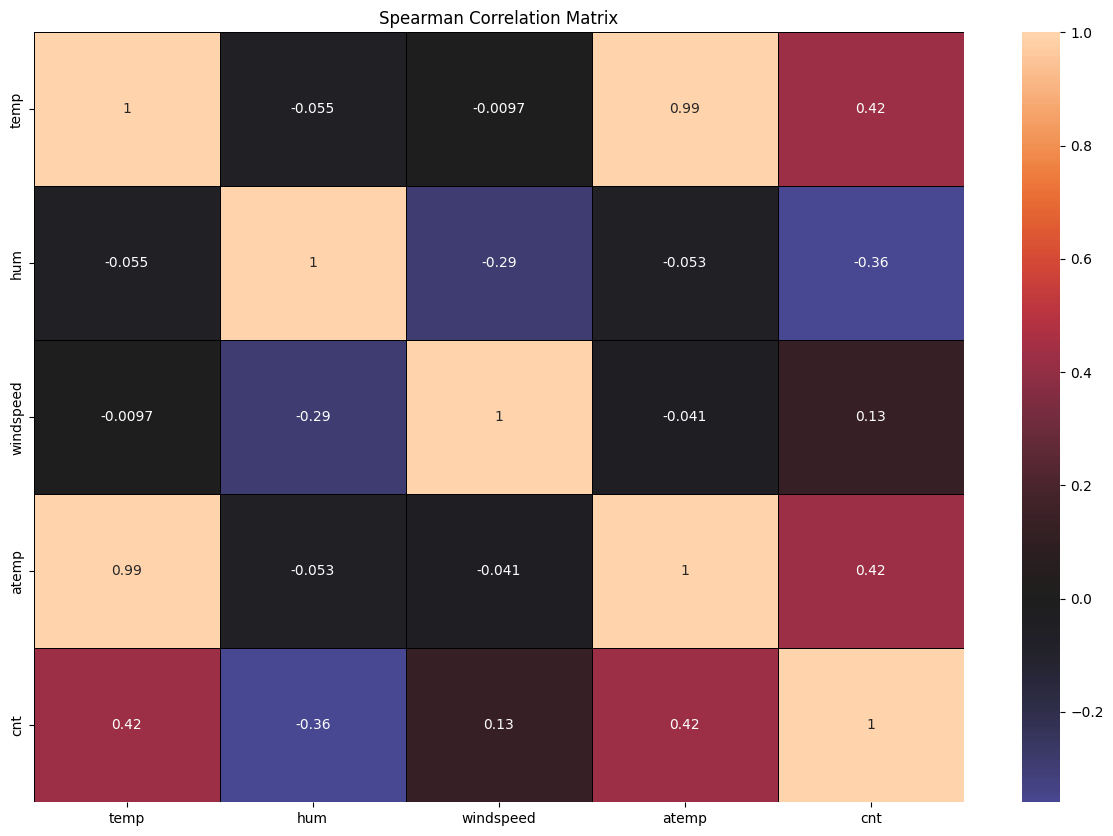

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, method='pearson', cmap=None):
    correlation_matrix = data.corr(method=method)
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, linewidths=0.5, linecolor='black', ax=ax, cbar=True)
    ax.set_title(f"{method.capitalize()} Correlation Matrix")
    plt.show()

corr_coof_Pearson = plot_correlation_matrix(data_numerical, method='pearson')
corr_coof_Spearman = plot_correlation_matrix(data_numerical, method='spearman')


In [139]:
print("Pearson correlation matrix:")
print(corr_coof_Pearson)
print("\nSpearman correlation matrix:")
print(corr_coof_Spearman)


Pearson correlation matrix:
None

Spearman correlation matrix:
None


**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [121]:
import pandas as pd

def get_dummies(df: pd.DataFrame, max_unique_values=10):
    categorical_cols = ['season', 'mnth', 'weekday', 'weathersit']
    dummy_cols = pd.DataFrame()
    
    for col in categorical_cols:
        unique_values = df[col].nunique()
        if unique_values <= max_unique_values:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            dummy_cols = pd.concat([dummy_cols, dummies], axis=1)
    
    features = pd.concat([df, dummy_cols], axis=1)
    features = features.drop(categorical_cols, axis=1)
    return features


In [122]:
features = get_dummies(data, max_unique_values=10)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [123]:
features['night_hours'] = (data['hr'] >= 22) | (data['hr'] <= 5)

features.drop('hr', axis=1, inplace=True)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [124]:
features_lr = features.drop(['atemp', 'date'], axis = 1)


In [129]:
def get_train_data(df: pd.DataFrame, target: str, test_size: float):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test


In [130]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [131]:
def train_linear_model(X_train, y_train):
  X_train.columns = X_train.columns.astype(str)
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [132]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 16069.674, test: 15396.523
R^2 train: 0.520, test: 0.513


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

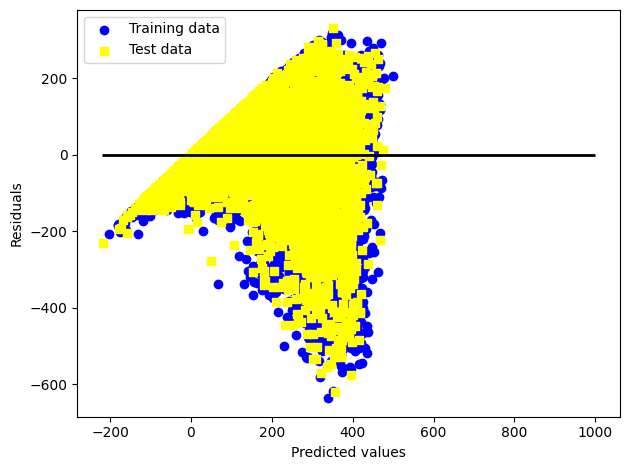

In [136]:
import matplotlib.pyplot as plt

def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train,
                c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test,
                c='yellow', marker='s', label='Test data')

    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    
    plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
    
    
    plt.tight_layout()

plot_residuals(y_train_pred, y_train, y_test_pred, y_test)
plt.show()


**Висновки з завдання (детальні)**

14.   Модель дає правильну оцінку в 51% випадках.
15.   Видалено date бо не є важливою змінною. Аtemp видалено через мультиколінеарність з зміною temp. Видаляємо саме atemp тому що вона вказує більше на почуття температури конкретної людини. 
